In [1]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# This extracts the log information for processing
def extract_metric_series(log_file_path):
    metric_dict = defaultdict(list)

    with open(log_file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()

            if line.startswith("{") and line.endswith("}"):
                try:
                    data = ast.literal_eval(line)
                    if isinstance(data, dict) and "loss" in data:
                        for key, value in data.items():
                            metric_dict[key].append(value)
                except Exception:
                    continue

    return dict(metric_dict)

In [3]:
# Get metrics
log_file = "Training Results\\Metrics\\newData.txt"
metrics_over_time = extract_metric_series(log_file)

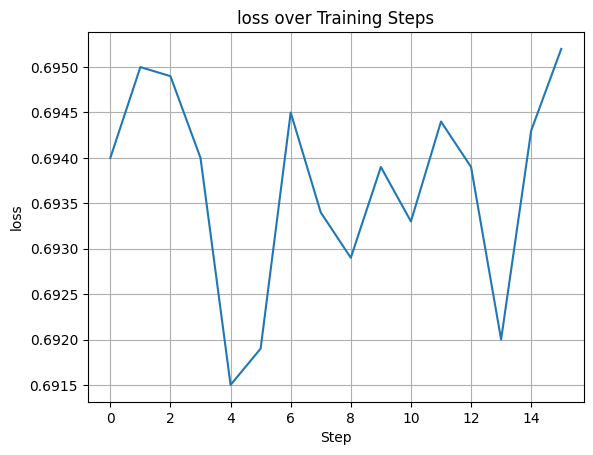

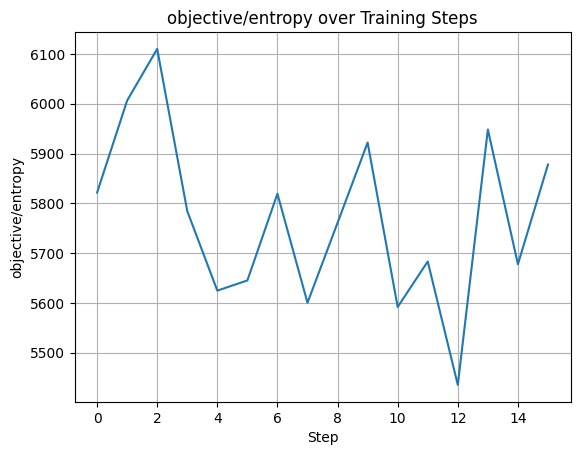

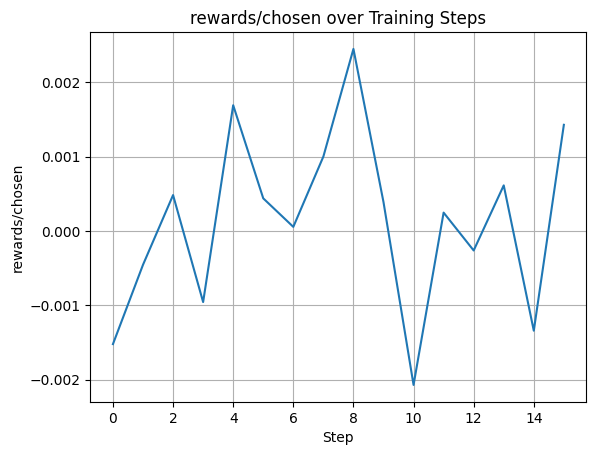

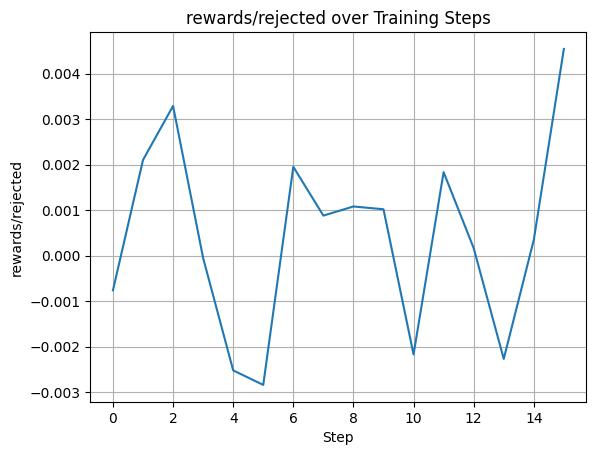

In [4]:
# Create the metrics
wanted_list = ['loss', 'objective/entropy', 'rewards/chosen', 'rewards/rejected']
wanted_metrics = set(wanted_list)

for metric in metrics_over_time:
    if metric in wanted_metrics:
        metric_list = metrics_over_time[metric]
        steps = list(range(len(metric_list)))

        plt.figure()
        plt.plot(steps, metric_list, label=metric)
        plt.xlabel('Step')
        plt.ylabel(metric)
        plt.title(metric + ' over Training Steps')
        plt.grid(True)
        plt.show()

loss Std: 0.0011251481383948282
loss Mean: 0.69369375
objective/entropy Std: 176.74621979826338
objective/entropy Mean: 5769.338656711578


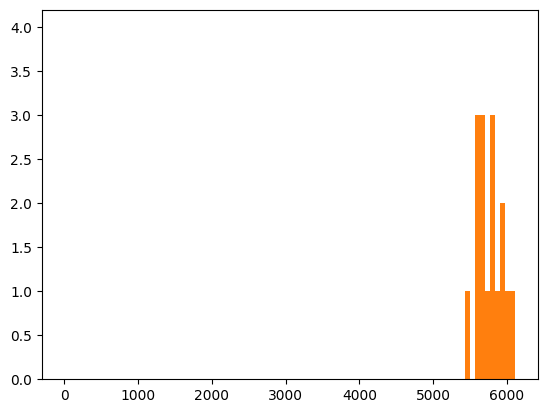

In [5]:
# Making a histogram
wanted_list = ['loss','objective/entropy']
wanted_metrics = set(wanted_list)

for metric in metrics_over_time:
    if metric in wanted_metrics:
        metric_list = metrics_over_time[metric]
        cur_std = np.std(metric_list, ddof=True)
        cur_mean = np.mean(metric_list)

        print(f'{metric} Std: {cur_std}')
        print(f'{metric} Mean: {cur_mean}')

        plt.hist(metrics_over_time[metric])
        # plt.xlabel('Step')
        # plt.ylabel(metric)
        # plt.title(metric)
        # plt.grid(False)
        # plt.show()

In [6]:
# Getting the starting and final loss
final_loss = metrics_over_time['loss'][-1]
print(f'Final Loss: {final_loss}')

starting_loss = metrics_over_time['loss'][0]
print(f'Starting Loss: {starting_loss}')

Final Loss: 0.6952
Starting Loss: 0.694


In [7]:
# Getting the starting and final entropy
final_entropy = metrics_over_time['objective/entropy'][-1]
print(f'Final entropy: {final_entropy}')

starting_entropy = metrics_over_time['objective/entropy'][0]
print(f'Starting entropy: {starting_entropy}')

Final entropy: 5877.830828857422
Starting entropy: 5821.528240966797
